In [1]:
# set up the python
import cosima_cookbook as cc
from dask.distributed import Client
import matplotlib.pyplot as plt
import matplotlib.path as mpath
import numpy as np
import xarray as xr
import cmocean as cm
import cartopy.crs as ccrs
import cmocean as cm
import cartopy.feature as cft
import cftime
import IPython.display
import sys, os, warnings

got 1998-mean SSH of MOM6

In [2]:
# load the MOM6 data
db='/g/data/x77/amh157/PanAnt/panant.db'
session=cc.database.create_session(db)
expts = ['panant-v2','panant-hycom1','panant-v3','panant-hycom1-v2','panant-01-zstar']

In [3]:
client = Client()
client

Connection method: Cluster object,Cluster type: distributed.LocalCluster
Dashboard: /proxy/8787/status,
Dashboard: /proxy/8787/status,Workers: 4
Total threads: 16,Total memory: 44.92 GiB
Status: running,Using processes: True
Comm: tcp://127.0.0.1:37353,Workers: 4
Dashboard: /proxy/8787/status,Total threads: 16
Started: Just now,Total memory: 44.92 GiB
Comm: tcp://10.0.128.159:46093,Total threads: 4
Dashboard: /proxy/35369/status,Memory: 11.23 GiB
Nanny: tcp://127.0.0.1:38933,


In [4]:
# get the depth
depth = cc.querying.getvar('panant-v2','deptho',session,n=1)
land_mask = np.squeeze(depth.values)*0
land_mask[np.isnan(land_mask)] = 1
land_mask = np.where(land_mask==1,land_mask,np.nan)

In [5]:
# get 1-year SSH value of MOM6 
zos = cc.querying.getvar('panant-v2','zos', session,chunks={'xh':120,'yh':120})
zos = zos.isel(time=slice(2555,2920))

In [6]:
# check the time period
t0 = zos.time.item(0).strftime("%Y-%m-%d"),
t1 = zos.time.item(-1).strftime("%Y-%m-%d"),

print([t0,t1])

[('1998-01-01',), ('1998-12-31',)]


In [7]:
# calculate the annual mean of SSH (MOM6)
zos_mean = zos.mean('time').load()

And then ACCESS-OM2

In [8]:
session_2 = cc.database.create_session()

In [24]:
# get all of the experiments
cc.querying.get_experiments(session_2, all=True)

,experiment,contact,email,created,description,notes,url,root_dir,ncfiles
0,025deg_jra55_iaf_omip2_cycle1,Ryan Holmes,ryan.holmes@unsw.edu.au,2020-11-03,0.25 degree ACCESS-OM2 global model configurat...,None,None,/g/data/ik11/outputs/access-om2-025/025deg_jra...,2171
1,025deg_jra55_iaf_omip2_cycle2,Ryan Holmes,ryan.holmes@unsw.edu.au,2020-11-03,0.25 degree ACCESS-OM2 global model configurat...,None,None,/g/data/ik11/outputs/access-om2-025/025deg_jra...,2171
2,025deg_jra55_iaf_omip2_cycle3,Ryan Holmes,ryan.holmes@unsw.edu.au,2020-11-03,0.25 degree ACCESS-OM2 global model configurat...,None,None,/g/data/ik11/outputs/access-om2-025/025deg_jra...,2210
3,025deg_jra55_iaf_omip2_cycle4,Ryan Holmes,ryan.holmes@unsw.edu.au,2020-11-03,0.25 degree ACCESS-OM2 global model configurat...,None,None,/g/data/ik11/outputs/access-om2-025/025deg_jra...,2171
4,025deg_jra55_iaf_omip2_cycle6,Ryan Holmes,ryan.holmes@unsw.edu.au,2020-11-03,0.25 degree ACCESS-OM2 global model configurat...,None,None,/g/data/ik11/outputs/access-om2-025/025deg_jra...,2174
...,...,...,...,...,...,...,...,...,...
104,01deg_jra55v13_ryf9091_qian_ctrl,None,None,None,None,None,None,/g/data/ik11/outputs/access-om2-01/01deg_jra55...,3600
105,01deg_jra55v140_iaf_cycle3_HF,Andrew Kiss,andrew.kiss@anu.edu.au,2020-11-11,0.1 degree ACCESS-OM2 global model configurati...,Run configuration and history: https://github....,None,/g/data/ik11/outputs/access-om2-01/01deg_jra55...,9272
106,01deg_jra55v13_ryf9091_easterlies_up10_noDSW,None,None,None,None,None,None,/g/data/ik11/outputs/access-om2-01/01deg_jra55...,360
107,01deg_jra55v13_ryf9091_easterlies_up10_meridional,None,None,None,None,None,None,/g/data/ik11/outputs/access-om2-01/01deg_jra55...,420


In [41]:
# get the variables of 0.1 deg model
variables = cc.querying.get_variables(session_2, experiment='01deg_jra55v13_iaf')
variables[1:20]

,name,long_name,frequency,ncfile,# ncfiles,time_start,time_end
1,TEMP,None,None,restart149/ice/monthly_sstsss.nc,10,None,None
2,Tsfcn,None,None,restart197/ice/iced.2018-01-01-00000.nc,10,None,None
3,aice_io,None,None,2004-03-01-restart114/ice/i2o.nc,10,None,None
4,aicen,None,None,restart197/ice/iced.2018-01-01-00000.nc,10,None,None
5,angle,None,None,restart000/ice/grid.nc,10,None,None
6,angleT,None,None,restart000/ice/grid.nc,10,None,None
7,average_DT,Length of average period,None,output018/ocean/rregionocean_daily.nc,5,None,None
8,average_T1,Start time for average period,None,output018/ocean/rregionocean_daily.nc,5,None,None
9,average_T2,End time for average period,None,output018/ocean/rregionocean_daily.nc,5,None,None
10,clat_t,None,None,restart000/ice/grid.nc,10,None,None


In [42]:
# 1 deg variable
variables = cc.querying.get_variables(session_2, experiment='1deg_jra55v13_iaf_spinup1_B1')
variables[1:20]

,name,long_name,frequency,ncfile,# ncfiles,time_start,time_end
1,sslx_i,None,None,output042/ocean/o2i.nc,60,None,None
2,ssly_i,None,None,output042/ocean/o2i.nc,60,None,None
3,sss_i,None,None,output042/ocean/o2i.nc,60,None,None
4,sst_i,None,None,output042/ocean/o2i.nc,60,None,None
5,ssu_i,None,None,output042/ocean/o2i.nc,60,None,None
6,ssv_i,None,None,output042/ocean/o2i.nc,60,None,None
7,time,None,None,output042/ocean/o2i.nc,60,None,None
8,average_DT,Length of average period,1 daily,output059/ocean/ocean_daily.nc,12,2198-01-01 00:00:00,2258-01-01 00:00:00
9,average_T1,Start time for average period,1 daily,output059/ocean/ocean_daily.nc,12,2198-01-01 00:00:00,2258-01-01 00:00:00
10,average_T2,End time for average period,1 daily,output059/ocean/ocean_daily.nc,12,2198-01-01 00:00:00,2258-01-01 00:00:00


In [48]:
# 0.25 deg variable
variables = cc.querying.get_variables(session_2, experiment='025deg_jra55_iaf_omip2_cycle1')
variables[1:30]

,name,long_name,frequency,ncfile,# ncfiles,time_start,time_end
1,TEMP,None,None,restart010/ice/monthly_sstsss.nc,14,None,None
2,Time,Time,None,restart025/ocean/ocean_barotropic.res.nc,168,None,None
3,Tsfcn,None,None,restart000/ice/iced.1959-01-01-00000.nc,14,None,None
4,advectionu,advectionu,None,restart020/ocean/ocean_velocity_advection.res.nc,14,None,None
5,advectionv,advectionv,None,restart020/ocean/ocean_velocity_advection.res.nc,14,None,None
6,age_global,age_global,None,restart000/ocean/ocean_age.res.nc,14,None,None
7,agm_array,agm_array,None,restart060/ocean/ocean_neutral.res.nc,14,None,None
8,aice_io,None,None,restart040/ice/i2o.nc,14,None,None
9,aicen,None,None,restart000/ice/iced.1959-01-01-00000.nc,14,None,None
10,angle,None,None,restart010/ice/grid.nc,14,None,None


In [44]:
#SSH variable in ACCESS-OM2 models
variable = 'eta_t'

# dates to match the AVISO record
start_time = '1998-01-01'
end_time = '1998-12-31'

In [54]:
# 1 degree SSH
expt_1 = '1deg_jra55v13_iaf_spinup1_B1'  # 1-deg experiment
ssh1 = cc.querying.getvar(expt_1, variable, session_2, start_time=start_time, end_time=end_time)
ssh1 = ssh1.sel(time=slice(start_time, end_time)) # slice to the same time range as MOM6
ssh1_mean = ssh1.mean('time').load()

In [49]:
# 0.25 degree mean SSH
expt_2 = '025deg_jra55_iaf_omip2_cycle1'  # 0.25-deg experiment
ssh025 = cc.querying.getvar(expt_2, variable, session_2, start_time=start_time, end_time=end_time)
ssh025 = ssh025.sel(time=slice(start_time, end_time)) # slice to the same time range as MOM6
ssh025_mean = ssh025.mean('time').load()

In [51]:
# 0.1 degree mean SSH
expt_3 = '01deg_jra55v13_iaf'  # 0.25-deg experiment
ssh01 = cc.querying.getvar(expt_3, variable, session_2, start_time=start_time, end_time=end_time)
ssh01 = ssh01.sel(time=slice(start_time, end_time)) # slice to the same time range as MOM6
ssh01_mean = ssh01.mean('time').load()

plot annual mean SSH

Text(0, 0.5, 'Mean SSH (m)')

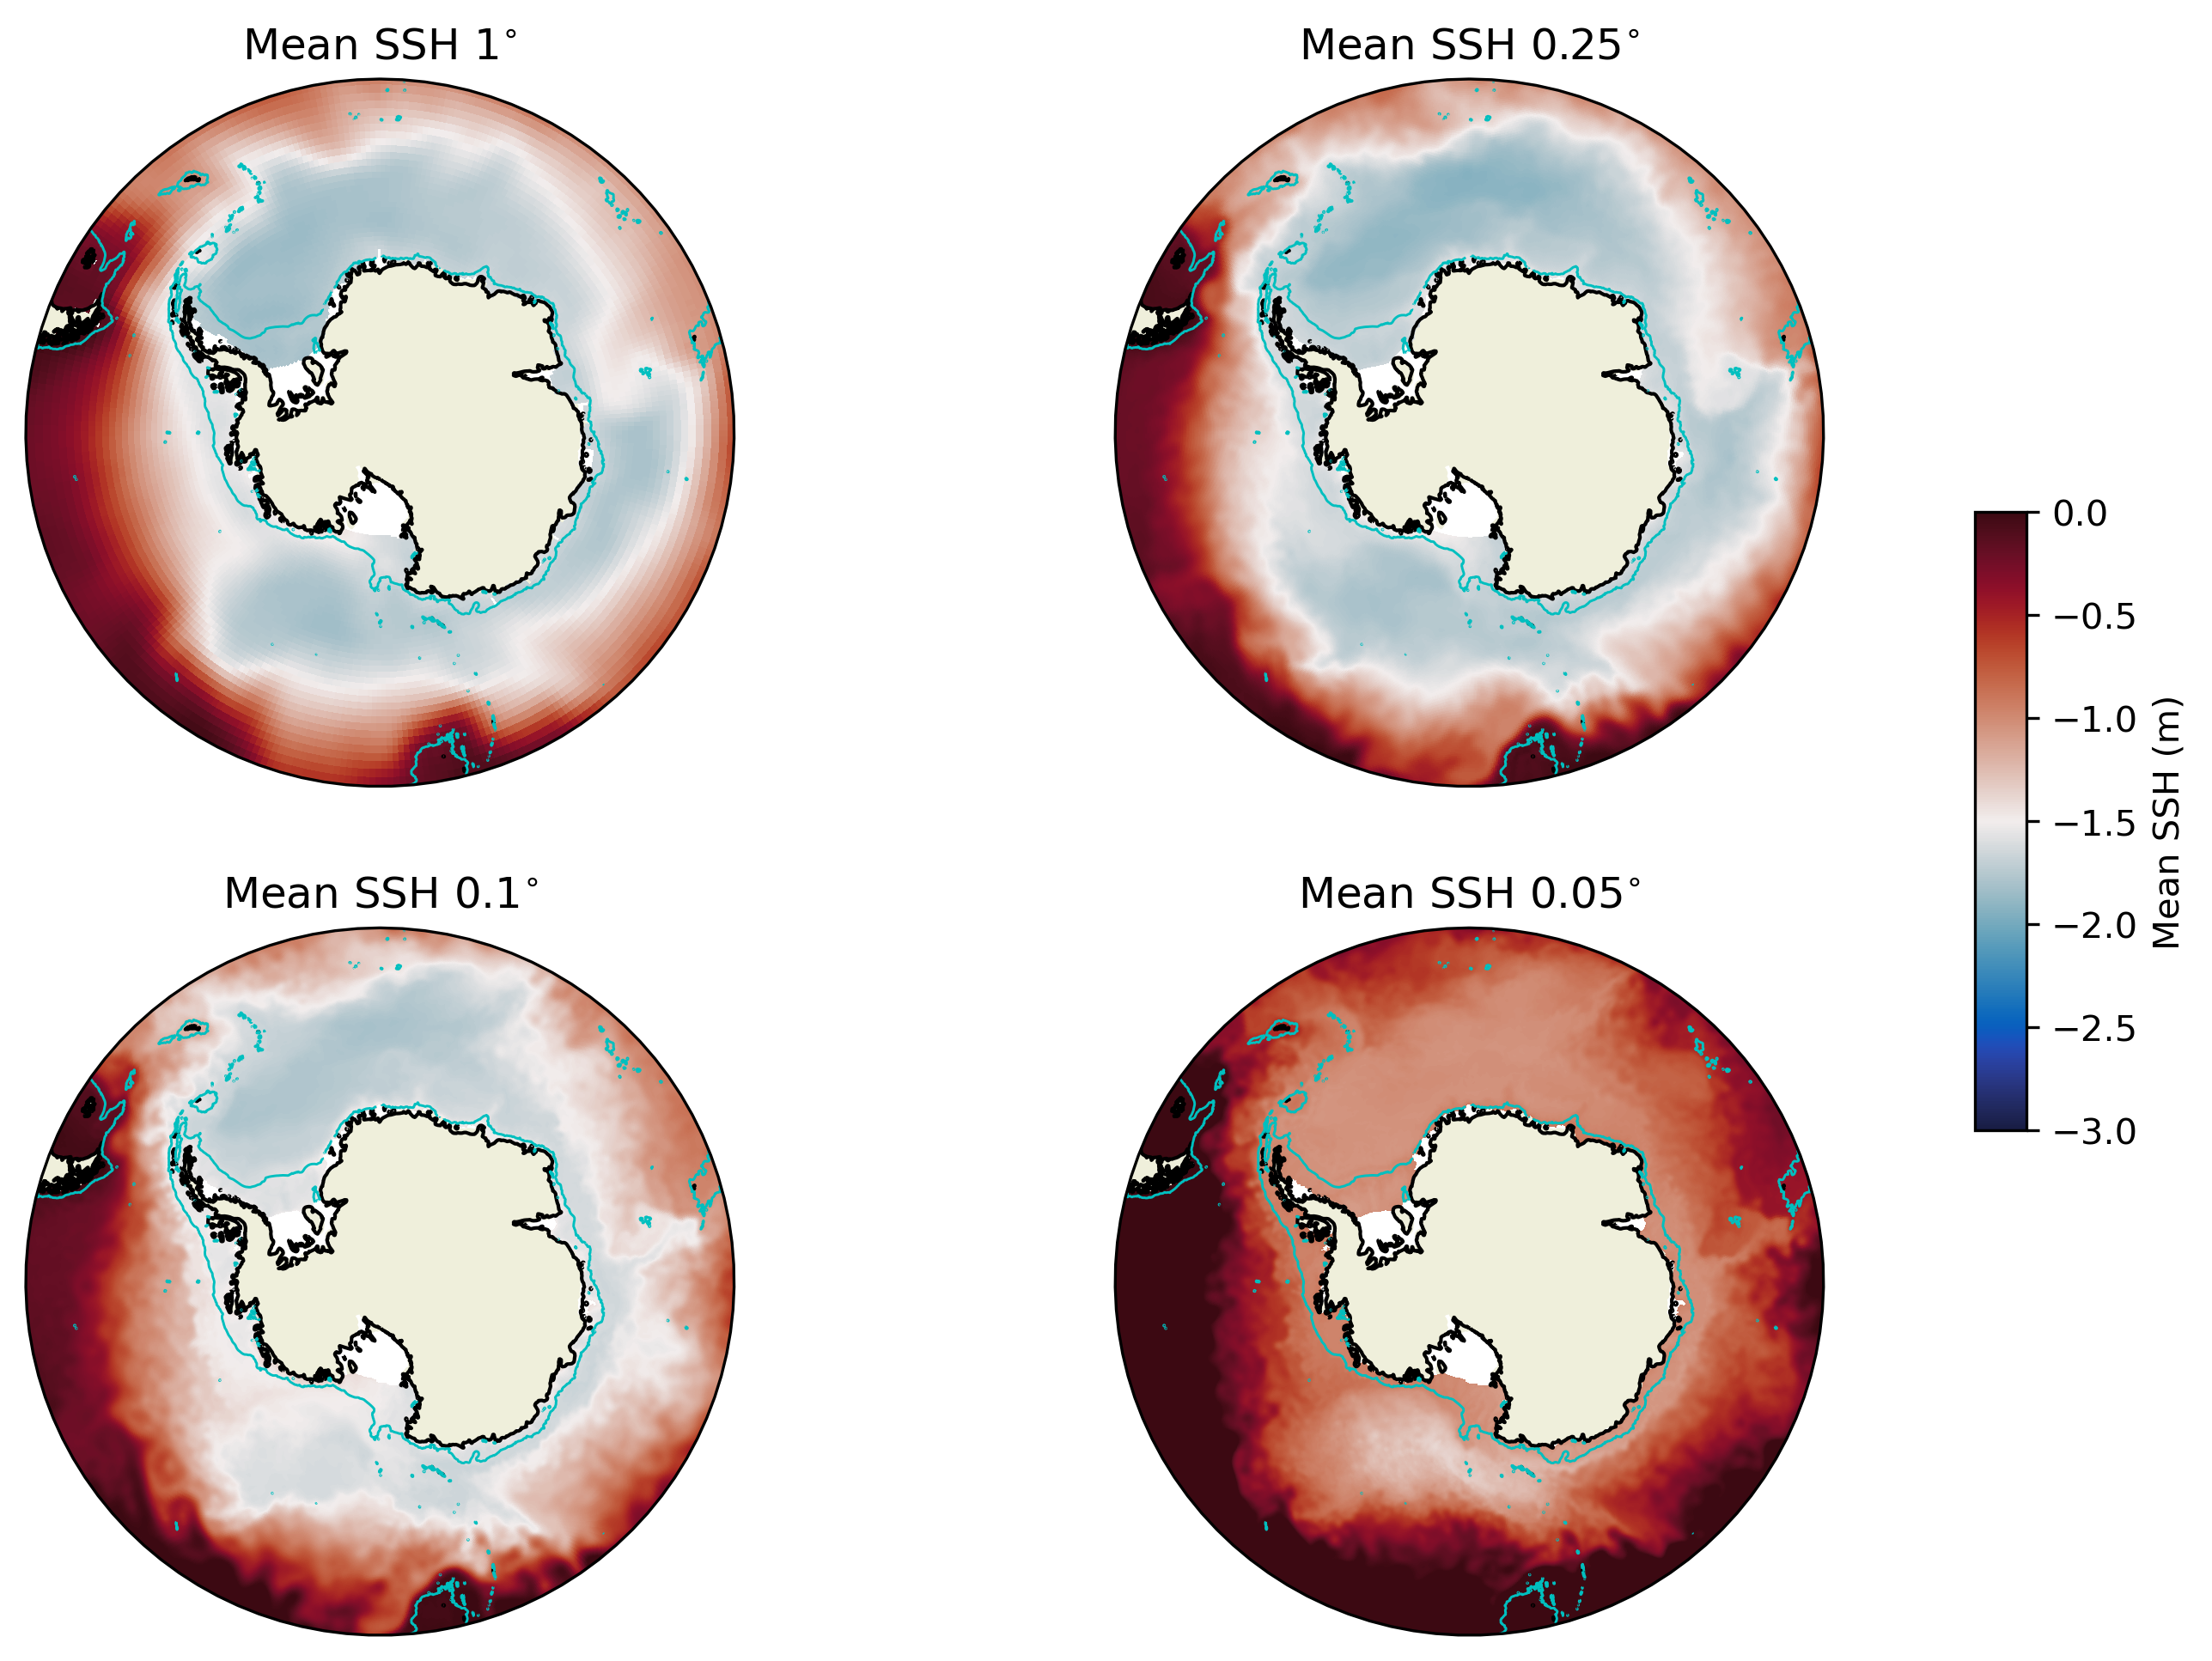

In [60]:
# 1 deg 
projection=ccrs.SouthPolarStereo()
fig = plt.figure(figsize=(10, 8), dpi=300)
ax = plt.subplot(2, 2, 1, projection=projection)
ax.coastlines(resolution='50m')
ax.add_feature(cft.LAND)
ax.set_extent([-280, 80, -82, -50], crs=ccrs.PlateCarree())
ax.set_title('Mean SSH 1$^{\circ}$')

theta = np.linspace(0, 2*np.pi, 100)
center, radius = [0.5, 0.5], 0.5
verts = np.vstack([np.sin(theta), np.cos(theta)]).T
circle = mpath.Path(verts * radius + center)
ax.set_boundary(circle, transform=ax.transAxes)
depth.plot.contour(ax=ax,levels=[1000],linewidths=0.7,colors='c',transform=ccrs.PlateCarree())
p1 = ssh1_mean.plot(vmin=-3,vmax=0,transform=ccrs.PlateCarree(),cmap=cm.cm.balance,add_colorbar=False)
ax.set_title('Mean SSH 1$^{\circ}$')
# 0.25 deg
ax = plt.subplot(2, 2, 2, projection=projection)
ax.coastlines(resolution='50m')
ax.add_feature(cft.LAND)
ax.set_extent([-280, 80, -82, -50], crs=ccrs.PlateCarree())
ax.set_title('Mean SSH 0.25$^{\circ}$')

theta = np.linspace(0, 2*np.pi, 100)
center, radius = [0.5, 0.5], 0.5
verts = np.vstack([np.sin(theta), np.cos(theta)]).T
circle = mpath.Path(verts * radius + center)
ax.set_boundary(circle, transform=ax.transAxes)
depth.plot.contour(ax=ax,levels=[1000],linewidths=0.7,colors='c',transform=ccrs.PlateCarree())
p1 = ssh025_mean.plot(vmin=-3,vmax=0,transform=ccrs.PlateCarree(),cmap=cm.cm.balance,add_colorbar=False)
ax.set_title('Mean SSH 0.25$^{\circ}$')
# 0.1 deg
ax = plt.subplot(2, 2, 3, projection=projection)
ax.coastlines(resolution='50m')
ax.add_feature(cft.LAND)
ax.set_extent([-280, 80, -82, -50], crs=ccrs.PlateCarree())
ax.set_title('Mean SSH 0.1$^{\circ}$')

theta = np.linspace(0, 2*np.pi, 100)
center, radius = [0.5, 0.5], 0.5
verts = np.vstack([np.sin(theta), np.cos(theta)]).T
circle = mpath.Path(verts * radius + center)
ax.set_boundary(circle, transform=ax.transAxes)
depth.plot.contour(ax=ax,levels=[1000],linewidths=0.7,colors='c',transform=ccrs.PlateCarree())
p1 = ssh01_mean.plot(vmin=-3,vmax=0,transform=ccrs.PlateCarree(),cmap=cm.cm.balance,add_colorbar=False)
ax.set_title('Mean SSH 0.1$^{\circ}$')
#0.05 MOOM6
ax = plt.subplot(2, 2, 4, projection=projection)
ax.coastlines(resolution='50m')
ax.add_feature(cft.LAND)
ax.set_extent([-280, 80, -82, -50], crs=ccrs.PlateCarree())
ax.set_title('Mean SSH 0.05$^{\circ}$')

theta = np.linspace(0, 2*np.pi, 100)
center, radius = [0.5, 0.5], 0.5
verts = np.vstack([np.sin(theta), np.cos(theta)]).T
circle = mpath.Path(verts * radius + center)
ax.set_boundary(circle, transform=ax.transAxes)
depth.plot.contour(ax=ax,levels=[1000],linewidths=0.7,colors='c',transform=ccrs.PlateCarree())
p1 = zos_mean.plot(vmin=-3,vmax=0,transform=ccrs.PlateCarree(),cmap=cm.cm.balance,add_colorbar=False)
ax.set_title('Mean SSH 0.05$^{\circ}$')
# add the colorbar
ax = plt.axes([0.92, 0.37, 0.02, 0.3])
cb = plt.colorbar(p1, cax=ax, orientation='vertical')
cb.ax.set_ylabel('Mean SSH (m)')
